In [1]:
from skimage import filters, io, draw, transform, measure, segmentation, color, morphology
from skimage.future import graph
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as pl
import math
import pandas as pd
import matplotlib.patches as mpatches
from sklearn import preprocessing
from scipy import ndimage

from slice_tools import *
from data_tools import *
from processing_tools import *

In [2]:
filePath = '/Users/s1101153/Desktop/TIFs/'
infoFile = '/Users/s1101153/Dropbox/Emily/z-stack_info.csv'

In [3]:
if input('Re-calculate image slices? y/n: ') == 'y':
    print('Re-calculating slices...')
    f = open(infoFile, 'r')
    first_time=True
    for line in f.readlines():
        if line.startswith('SUM'):
            vals=line.split(',')
            fileName = filePath+vals[0]
            umSize=float(vals[1])
            L=int(vals[2])
            Cx=float(vals[3])
            Cy=float(vals[4])
            g_index=int(vals[5]) #call the fuller channel the green one
            r_index=int(vals[6]) #call the sparser channel the red one
            n_slice = 12
            if(first_time):
                slices = read_slice(fileName, L, umSize, Cx, Cy, g_index, r_index)
                first_time=False
            else:
                newslice = read_slice(fileName, L, umSize, Cx, Cy, g_index, r_index)
                slices = pd.concat([slices, newslice], axis=0)
    f.close() 
    slices
    slices.to_pickle('/Users/s1101153/Dropbox/Emily/nice_slices.pkl')
    print('New slices saved')
else:
    print('Reading saved slices')
    slices=pd.read_pickle('/Users/s1101153/Dropbox/Emily/nice_slices.pkl')

Re-calculate image slices? y/n: n
Reading saved slices


/Users/s1101153/anaconda3/lib/python3.7/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


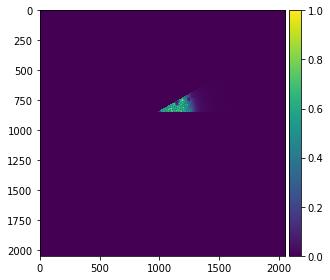

In [4]:
idx = pd.IndexSlice
test_im = slices.loc['/Users/s1101153/Desktop/TIFs/SUM_2014_5_30-T3M_7_63xoil_1.tif','green',0]
# test_im.values
io.imshow(test_im.values[0])

In [31]:
i=0
for s in slices['imArray']:
    lab_im = threshold_and_label(s, highpass = False)
    areas=list()
    for region in measure.regionprops(lab_im):
        areas.append(region.area)
    if len(areas)>0:
        print(str(i) + ': ' + str(max(areas)))
    else:
        print(str(i) + ': 0')
    i=i+1

0: 21304
1: 23124
2: 27721
3: 42314
4: 68331
5: 66775
6: 62501
7: 55018
8: 35907
9: 23092
10: 21393
11: 21960
12: 1247
13: 781
14: 864
15: 1312
16: 1042
17: 1342
18: 1055
19: 882
20: 739
21: 2104
22: 654
23: 399
24: 1162
25: 851
26: 1821
27: 1748
28: 1045
29: 2330
30: 876
31: 1648
32: 1875
33: 2242
34: 2511
35: 2076
36: 9079
37: 10102
38: 9589
39: 12679
40: 14246
41: 14782
42: 14930
43: 12155
44: 11556
45: 9617
46: 7973
47: 8195
48: 1997
49: 3925
50: 7028
51: 14450
52: 25590
53: 29635
54: 24387
55: 14645
56: 5808
57: 2621
58: 1938
59: 2045
60: 189
61: 446
62: 714
63: 733
64: 670
65: 1304
66: 584
67: 545
68: 1321
69: 587
70: 190
71: 341
72: 2459
73: 32
74: 75
75: 130
76: 21
77: 5126
78: 366
79: 4
80: 2438
81: 130
82: 0
83: 64
84: 49
85: 0
86: 0
87: 0
88: 0
89: 301
90: 301
91: 1
92: 1982
93: 0
94: 0
95: 0
96: 13309
97: 12270
98: 8351
99: 5927
100: 3492
101: 2959
102: 3262
103: 6667
104: 7457
105: 9242
106: 9041
107: 9959
108: 12673
109: 10744
110: 8683
111: 3959
112: 5650
113: 3498
114: 

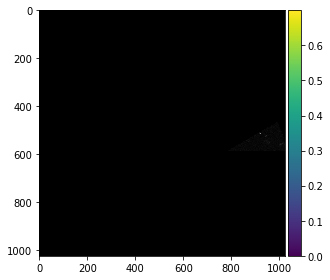

In [29]:
s=slices['imArray'][8]
lab_im = threshold_and_label(s, highpass = False)
areas=list()
for region in measure.regionprops(lab_im):
    areas.append(region.area)
measure.regionprops(lab_im)
image_label_overlay = color.label2rgb(lab_im, image=s, bg_label=0)
io.imshow(image_label_overlay)
